### Importing pyspark packages

In [1]:
from pyspark import SparkContext
sc = SparkContext()

In [3]:
import pandas
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("big data").config("spark.some.config.option", "some-value").getOrCreate()

### Importing additional packages required

In [25]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
%matplotlib inline

In [4]:
file_path = "/home/muparv/Desktop/marketing_campaign.csv"

### Reading the data

In [63]:
df = spark.read.csv(file_path, header=True, sep = '\t')

In [64]:
df.count()

2240

In [65]:
df.show(5)

+----+----------+----------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+------------+------------+------------+------------+------------+--------+-------------+---------+--------+
|  ID|Year_Birth| Education|Marital_Status|Income|Kidhome|Teenhome|Dt_Customer|Recency|MntWines|MntFruits|MntMeatProducts|MntFishProducts|MntSweetProducts|MntGoldProds|NumDealsPurchases|NumWebPurchases|NumCatalogPurchases|NumStorePurchases|NumWebVisitsMonth|AcceptedCmp3|AcceptedCmp4|AcceptedCmp5|AcceptedCmp1|AcceptedCmp2|Complain|Z_CostContact|Z_Revenue|Response|
+----+----------+----------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+----------

In [66]:
df.columns

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

### Finding the average income level of customers based on education level

In [17]:
from pyspark.sql.functions import col, avg

In [31]:
df_avg_income_education_level = df.groupby("Education").agg(avg(col("Income")))

In [32]:
df_avg_income_education_level.show()

+----------+-----------------+
| Education|      avg(Income)|
+----------+-----------------+
|  2n Cycle|         47633.19|
|       PhD|56145.31392931393|
|    Master|52917.53424657534|
|Graduation|52720.37365591398|
|     Basic|20306.25925925926|
+----------+-----------------+



### Finding the average age for each education level, Marital status

In [41]:
df_avg_income_education_marital_level = df.groupby("Education","Marital_Status").agg(avg(col("Income")))

In [42]:
df_avg_income_education_marital_level.show()

+----------+--------------+------------------+
| Education|Marital_Status|       avg(Income)|
+----------+--------------+------------------+
|    Master|        Absurd|           65487.0|
|       PhD|        Single|53314.614583333336|
|    Master|       Married| 53286.02898550725|
|       PhD|       Married| 58138.03157894737|
|     Basic|       Married|           21960.5|
|     Basic|        Single|18238.666666666668|
|    Master|         Alone|           61331.0|
|       PhD|      Divorced| 53096.61538461538|
|    Master|      Together|52109.009803921566|
|       PhD|      Together|  56041.4224137931|
|       PhD|         Alone|           35860.0|
|     Basic|      Divorced|            9548.0|
|  2n Cycle|      Together| 44736.41071428572|
|     Basic|      Together|21240.071428571428|
|Graduation|         Alone|           34176.0|
|Graduation|        Single| 51322.18292682927|
|Graduation|        Absurd|           79244.0|
|       PhD|         Widow|60288.083333333336|
|  2n Cycle| 

In [128]:
df = pd.read_csv("marketing_campaign.csv", sep='\t')
df.count()

ID                     2240
Year_Birth             2240
Education              2240
Marital_Status         2240
Income                 2216
Kidhome                2240
Teenhome               2240
Dt_Customer            2240
Recency                2240
MntWines               2240
MntFruits              2240
MntMeatProducts        2240
MntFishProducts        2240
MntSweetProducts       2240
MntGoldProds           2240
NumDealsPurchases      2240
NumWebPurchases        2240
NumCatalogPurchases    2240
NumStorePurchases      2240
NumWebVisitsMonth      2240
AcceptedCmp3           2240
AcceptedCmp4           2240
AcceptedCmp5           2240
AcceptedCmp1           2240
AcceptedCmp2           2240
Complain               2240
Z_CostContact          2240
Z_Revenue              2240
Response               2240
dtype: int64

In [129]:
df = df.dropna()
df.count()

ID                     2216
Year_Birth             2216
Education              2216
Marital_Status         2216
Income                 2216
Kidhome                2216
Teenhome               2216
Dt_Customer            2216
Recency                2216
MntWines               2216
MntFruits              2216
MntMeatProducts        2216
MntFishProducts        2216
MntSweetProducts       2216
MntGoldProds           2216
NumDealsPurchases      2216
NumWebPurchases        2216
NumCatalogPurchases    2216
NumStorePurchases      2216
NumWebVisitsMonth      2216
AcceptedCmp3           2216
AcceptedCmp4           2216
AcceptedCmp5           2216
AcceptedCmp1           2216
AcceptedCmp2           2216
Complain               2216
Z_CostContact          2216
Z_Revenue              2216
Response               2216
dtype: int64

### 24 rows with na are removed from df

In [130]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### Extracting the columns required for the analysis

In [131]:
df = df[["Year_Birth","Response","Income","NumWebVisitsMonth", "Dt_Customer", "Kidhome", "Teenhome", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "Marital_Status", "Education"]]

In [132]:
df.columns

Index(['Year_Birth', 'Response', 'Income', 'NumWebVisitsMonth', 'Dt_Customer',
       'Kidhome', 'Teenhome', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'Marital_Status', 'Education'],
      dtype='object')

### Question1: How many responses do you get on average every visit?

In [133]:
df['rate_visits'] = df['Response'] / df['NumWebVisitsMonth']

In [134]:
df['rate_visits'].count()

2206

Text(0.5, 1.0, 'Responses per Visit')

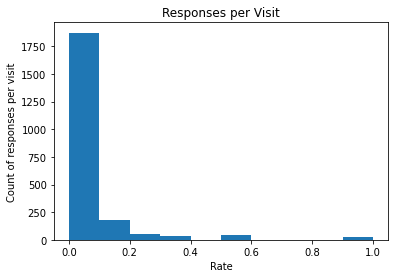

In [135]:
plt.hist(df['rate_visits'])
plt.xlabel("Rate")
plt.ylabel("Count of responses per visit")
plt.title("Responses per Visit")

In [136]:
average_rate_visits = df['rate_visits'].mean()

print('The average rate of visits: {} %'.format(average_rate_visits*100))

The average rate of visits: 4.368802976010592 %


From the above pic we can see lot of entries with 0 responses, it might be because that people are visting the platform multiple times before buying the product or there are visiting the web platform to check the product availability and purchasing from in person store.

In [137]:
temp = df.query('NumWebVisitsMonth > 0')

In [138]:
resp_filter = temp.query('Response > 0').shape[0]
average_rate_visits =  resp_filter/ temp.shape[0]
print('The average rate of visits: {} %'.format(average_rate_visits*100))

The average rate of visits: 15.095194922937443 %


### Question 2: Is it possible that income has a significant impact on this rate, or that our items have failed to attract customers?

In [193]:
df['Response'].unique()

array([1, 0])

[(0.0, 150000.0)]

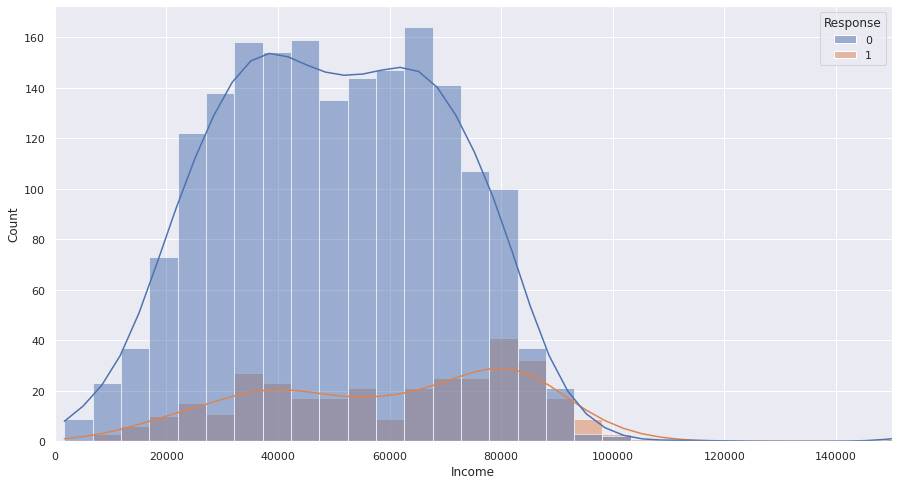

In [166]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(x=(df['Income']), kde = True ,hue=df['Response']).set(xlim = (0,150000))

AS we can see the distributions with 0 and 1 response are showing almost similar trends that means that income is not impacting the pattern of purchasing of products. It might be that the users are not liking the products or the similar products are offered for better prices in other app. If we had competator product pricing we will be able to get a better hang of the reason.

### Question3: Is there a substantial link between the number of children  and the amount of sweets customer consumes?

In [186]:
df['Kidhome'] = df['Kidhome'].astype('str')

Text(0.5, 1.0, 'Relation between Sweets and number of kids')

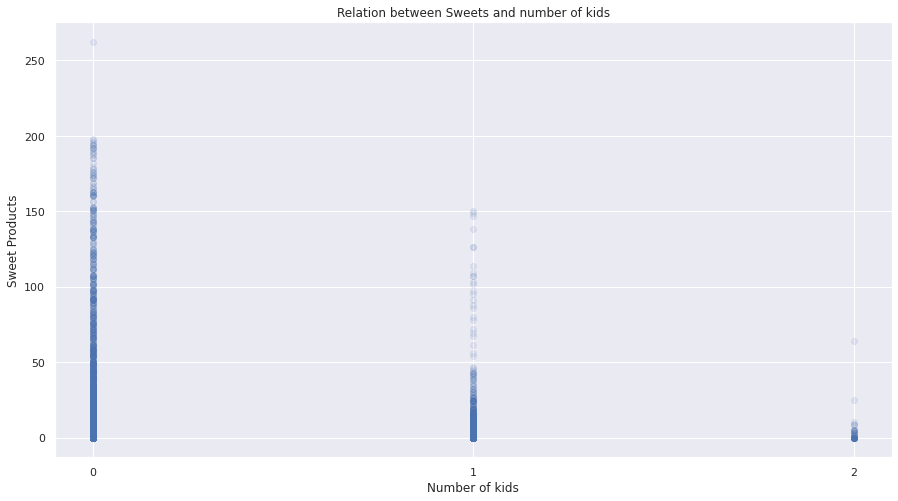

In [176]:
plt.scatter(y=df['MntSweetProducts'], x=df['Kidhome'],alpha =0.1)
plt.xlabel("Number of kids")
plt.ylabel("Sweet Products")
plt.title("Relation between Sweets and number of kids")

As we can see from above the consumers with less number of children are purchasing more sweets i.e., Sweet products have a negative correlation with the number of children a consumer has.

### Question 4: Assume that everyone is either a child (0-12), a teen (13-20), a young person (21-35), or an elderly person (36+). What is the most common age group that purchases from us?

In [187]:
df['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [188]:
df['Age'] = df['Dt_Customer'].dt.year - df['Year_Birth']

In [189]:
df['Age_group'] = 'Child'
df.loc[df['Age'] >= 13, 'Age_group'] = 'Teens'
df.loc[df['Age'] >= 21, 'Age_group'] = "Youth"
df.loc[df['Age'] >= 36, 'Age_group'] = "Old"

In [190]:
temp = df.groupby(df['Age_group']).count()

<AxesSubplot:ylabel='Age'>

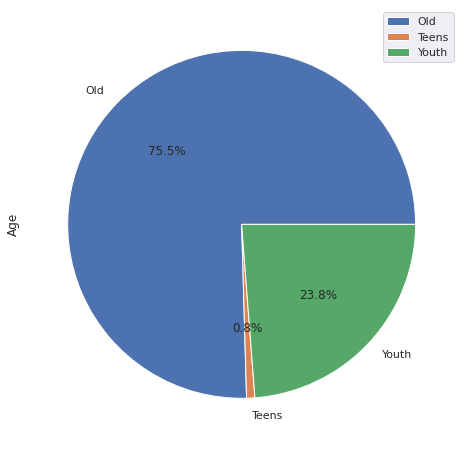

In [191]:
temp['Age'].plot.pie(y='count',legend= True,autopct='%1.1f%%')

In [192]:
max(df['Age'])

121

As we can see from the above pie chart, 75.5% of the customers who are purchasing are from the age group old i.e., people aging from (36 to 121 years)  